In [1]:
from cv2 import kmeans
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
sc = MinMaxScaler()


df = pd.read_csv("./out.csv")
df.drop(['Unnamed: 0'], inplace=True, axis=1)
print("dframe", df)
print("label", df['Disease'].value_counts())
print("num label", len(df['Disease'].unique()))
#map 
label_list = df['Disease'].unique()
label_map = dict([(label_list[i], i) for i in range(len(label_list))])
print(label_map)
df['Disease'] = df['Disease'].map(label_map)

# #fit
X = df.iloc[:, :-1].values
y = df['Disease'].values
X = sc.fit_transform(X)
# y = sc.fit_transform(y.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
print("data",  X_train.shape, y_train.shape)

nnb = GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors' : [i + 1 for i in range(20)]})
nnb.fit(X_train, y_train)
print("Label", y_train)
y_pred = nnb.predict(X_test)
print(f"accuracy of {nnb.best_estimator_}", (y_pred == y_test).sum()/y_test.shape[0])


# kmeans = KMeans(n_clusters=len(label_list))
# kmeans.fit(X_train, y_train)
# print("Label", y_train)
# y_pred = kmeans.predict(X_test)
# print(f"accuracy", (y_pred == y_test).sum()/y_test.shape[0])

# #eda
# print("main df", len(df))
# print("class 0", len(df.loc[(df['itching'] != 0) & (df['Disease'] == 6)]))

dframe       Severity  itching   skin_rash   continuous_sneezing   shivering  \
0           13        0           3                     0           0   
1           11        1           0                     0           0   
2           10        1           3                     0           0   
3            8        1           3                     0           0   
4           13        0           3                     0           0   
...        ...      ...         ...                   ...         ...   
5404        29        0           0                     0           0   
5405        31        0           0                     0           0   
5406        43        1           0                     0           0   
5407        16        0           3                     0           0   
5408        16        0           0                     0           0   

       stomach_pain   acidity   vomiting   indigestion   muscle_wasting  ...  \
0                 0         0       

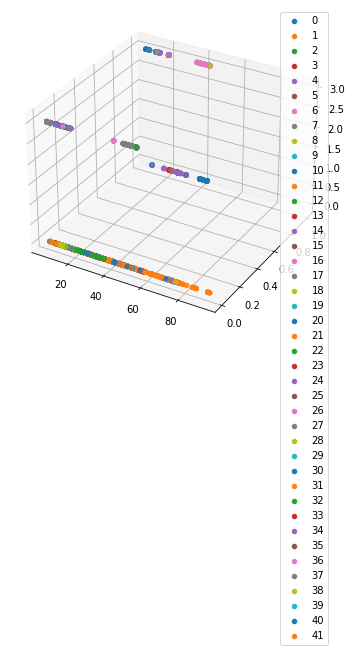

In [5]:
#plot
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(projection='3d')
for i in range(len(label_list)):
    ax.scatter(df.loc[df['Disease'] == i, 'Severity'], df.loc[df['Disease'] == i, 'itching'], df.loc[df['Disease'] == i,' skin_rash'], label=str(i))
ax.legend()

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.96      1.00      0.98        26
           2       0.92      1.00      0.96        23
           3       0.96      1.00      0.98        24
           4       0.96      0.96      0.96        25
           5       1.00      0.96      0.98        26
           6       0.96      0.92      0.94        26
           7       0.88      1.00      0.94        23
           8       1.00      1.00      1.00        25
           9       0.96      1.00      0.98        24
          10       0.96      1.00      0.98        24
          11       0.92      0.92      0.92        26
          12       0.92      0.96      0.94        24
          13       1.00      0.96      0.98        26
          14       0.92      0.96      0.94        25
          15       1.00      1.00      1.00        25
          16       0.96      0.96      0.96        25
          17       1.00    